In [16]:
%pylab inline
import skimage.io
import skimage
import skimage.filters




Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 16384 bytes but only got 0. Skipping tag 273
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 16384 bytes but only got 0. Skipping tag 279
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  " Skipping tag %s" % (size, len(data), tag)


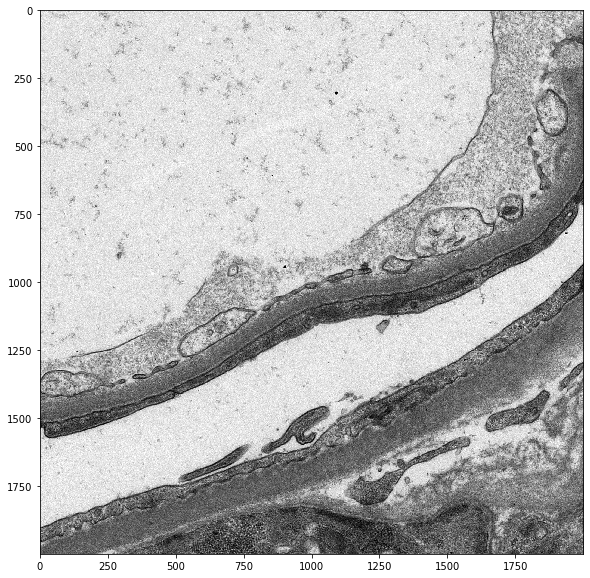

In [47]:

pth = r"G:\Můj disk\data\medical\orig\GBM\GBM_measurement_3000x_2020-04-03\Ma329-1-36.jpg"
img = skimage.io.imread(pth)
image = img[1000:3000, 1000:3000]
plt.figure(figsize=[10,10])
plt.imshow(image, cmap="gray")

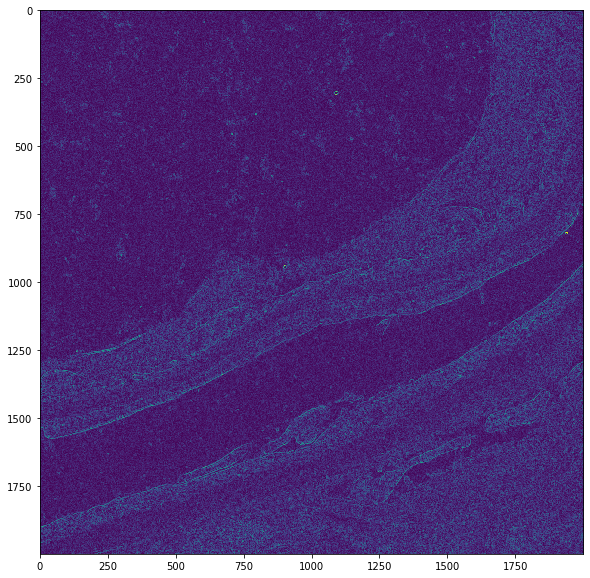

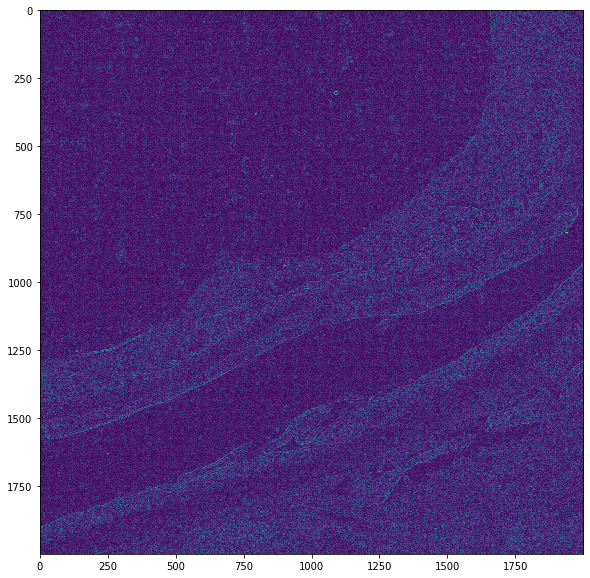

In [25]:
import skimage.feature

edg_sobel = skimage.filters.sobel(image)
edg_roberts = skimage.filters.roberts(image)
edg_canny = skimage.feature.canny(image, sigma=3)
plt.figure(figsize=[10,10])
plt.imshow(edg_sobel)
plt.figure(figsize=[10,10])
plt.imshow(edg_roberts)


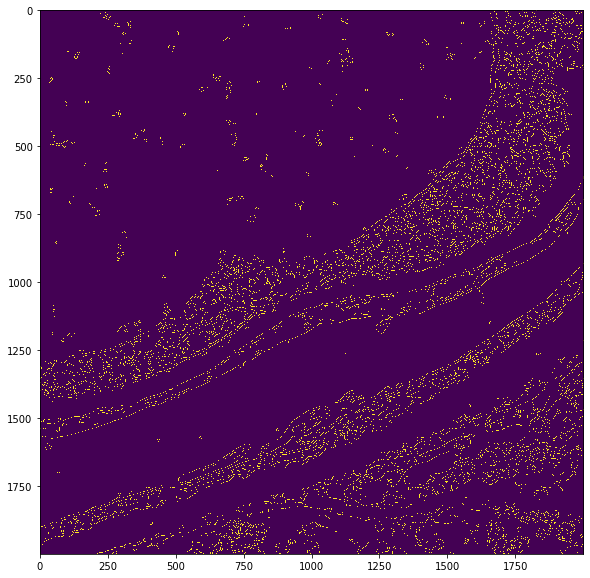

In [48]:
edg_canny = skimage.feature.canny(image, sigma=3)
plt.figure(figsize=[10,10])
plt.imshow(edg_canny)

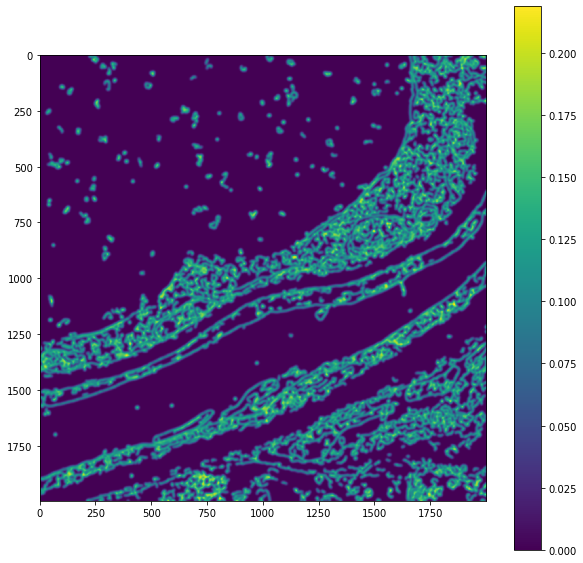

In [49]:
# import 
from scipy import ndimage
very_blurred = ndimage.gaussian_filter(edg_canny.astype(float), sigma=5)
plt.figure(figsize=[10, 10])
imshow(very_blurred)
plt.colorbar()

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


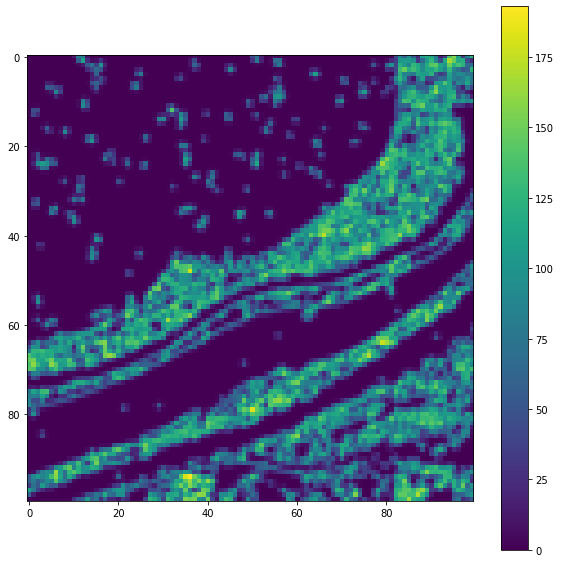

In [66]:
import scipy.misc
imgg_res = scipy.misc.imresize(very_blurred, 0.05)
plt.figure(figsize=[10, 10])
imshow(imgg_res)
plt.colorbar()

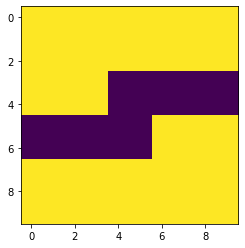

In [70]:
import numpy as np
kernel = np.ones([10,10])
kernel[5:7, 0:5]=-1
kernel[3:7, 4:6] = -1
kernel[3:5, 5:10]=-1
plt.imshow(kernel)

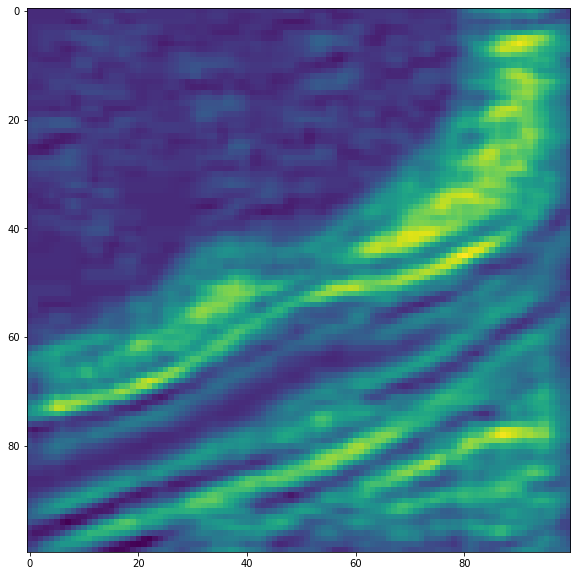

In [77]:
output1 = scipy.signal.convolve2d(imgg_res, kernel, 'same')
plt.figure(figsize=[10, 10])
imshow(output1)

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


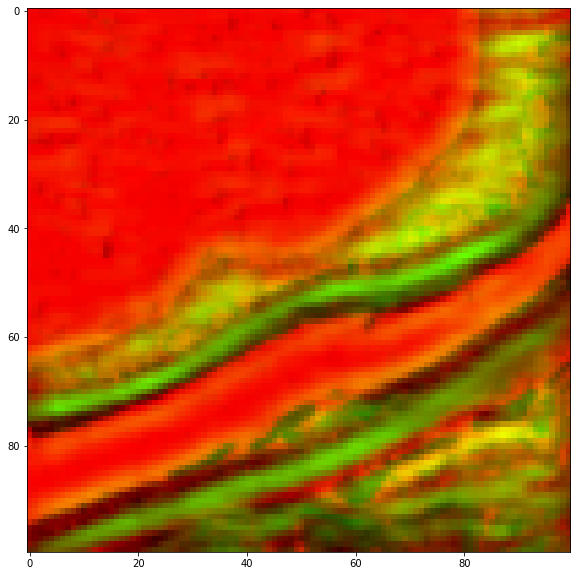

In [80]:
imgsmall = scipy.misc.imresize(image, 0.05)
imgc = np.zeros([*imgsmall.shape, 3])
imgc.shape
imgc[:,:,0] = imgsmall/np.max(imgsmall)
imgc[:,:,1] = output1/np.max(output1)
plt.figure(figsize=[10,10])
plt.imshow(imgc)

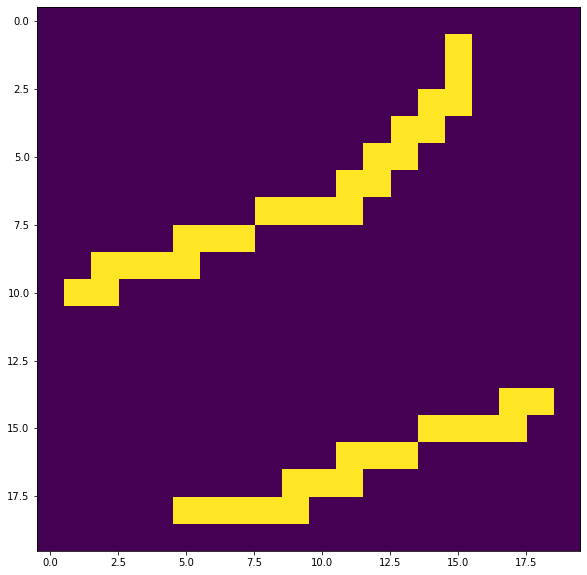

In [46]:
edges3 = skimage.feature.canny(imgg_res, sigma=3)
plt.figure(figsize=[10, 10])
imshow(edges3)
# plt.colorbar()